<a href="https://colab.research.google.com/github/LCaravaggio/EscueladeInnovacion/blob/main/OCR_y_An%C3%A1lisis_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR y tokenización

In [ ]:
import requests

In [ ]:
link='https://www.senado.gob.ar/prensa/adjunto/descargarArchivo/1726'
raw=""
ty="PdfReader"
pdf = requests.get(link)
my_raw_data = pdf.content

In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00


In [ ]:
from io import BytesIO
import PyPDF2
if pdf.status_code==200:
       with BytesIO(my_raw_data) as data:
         read_pdf = PyPDF2.PdfReader(data)
         for page in range(len(read_pdf.pages)):
           raw+=read_pdf.pages[page].extract_text()

In [ ]:
raw

'“2024 – Año de la Defensa de la V ida, la Libertad y la P ropiedad”  \n1º de marzo  de 202 4 Asamblea Legislativa  Pág. 1 \nDirección General de Taquígrafos  \n \n \nASAMBLEA \nLEGISLATIVA  \nPERÍODO 14 2º \n1° DE MARZO  DE 202 4 \nPRESIDE NCIA DE LA SEÑORA VICEPRESIDENTE  DE L A NACIÓN, \nDOCTORA  VICTORIA VILLARRUEL  \nSE ENCUENTRAN PRES ENTES  EN EL ESTRADO DE LA PRESIDENCIA EL \nSEÑOR PRESIDENTE DE LA HONORABLE CÁMARA DE DIPUTADOS  DE LA \nNAC IÓN, DIPUTAD O MARTÍN MENEM  Y EL SEÑOR PRESIDENTE \nPRO VISIONAL DEL HONORABLE SENADO  DE LA NACIÓN, SENADOR \nBARTOLOMÉ ESTEBAN ABDALA  \nSECRETARIOS:  \nSEÑOR AGUSTÍN GIUSTINIAN , SECRETARIO DEL HONORABLE SE NADO,  \nY SEÑOR TOMÁS FIGUEROA , SECRETARIO DE LA HONORABLE CÁMARA \nDE DIPUTADOS  Pendiente de aprobación por parte de la Honorable  Cámara  \n(artículo  32, inciso m del Reglamento  del Senado de la Nación ) \n “2024 – Año de la Defensa de la V ida, la Libertad y la P ropiedad”  \n1º de marzo  de 202 4 Asamblea Legislativa  Pág. 2 

In [ ]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(raw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
vocabulary = set(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


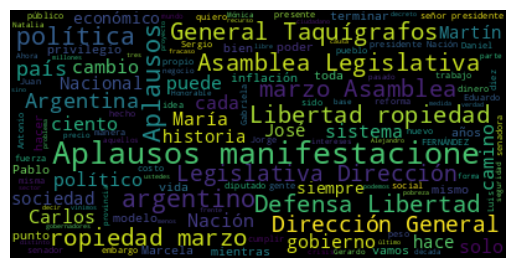

In [ ]:
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download("stopwords")

stopwords = set(stopwords.words('spanish'))

shortword = re.compile(r'\W*\b\w{1,3}\b')
text=shortword.sub('', raw)

wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

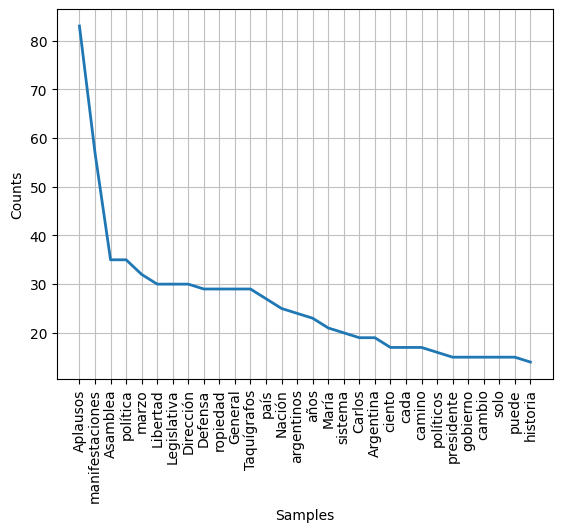

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]

shortword = re.compile(r'\b\w{1,3}\b')
unwanted_chars = re.compile(r'[^\w\s]')
filtered_tokens = [unwanted_chars.sub('', shortword.sub('', word)) for word in filtered_tokens]

manual=['', '2024']
filtered_tokens = [word for word in filtered_tokens if word.lower() not in manual]

fd = nltk.FreqDist(filtered_tokens)
fd.plot(30, cumulative=False)

In [ ]:
import pandas as pd
df = pd.DataFrame(list(fd.items()), columns=['Token', 'Frequency'])
df = df.sort_values(by='Frequency', ascending=False)

In [ ]:
df[:20]

,Token,Frequency
650,Aplausos,83
786,manifestaciones,57
4,Asamblea,35
1149,política,35
3,marzo,32
5,Legislativa,30
6,Dirección,30
1,Libertad,30
0,Defensa,29
2,ropiedad,29


# Análisis de Sentimiento

In [1]:
%%capture
!pip install pysentimiento

In [2]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:81: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [3]:
analyzer.predict("Qué gran jugador es Messi")

AnalyzerOutput(output=POS, probas={POS: 0.946, NEU: 0.037, NEG: 0.017})

In [4]:
analyzer.predict("Esto es pésimo")

AnalyzerOutput(output=NEG, probas={NEG: 0.887, NEU: 0.098, POS: 0.014})

In [5]:
analyzer.predict("Qué es esto?")

AnalyzerOutput(output=NEU, probas={NEU: 0.548, NEG: 0.412, POS: 0.041})

In [6]:
analyzer.predict("jejeje no te creo mucho")

AnalyzerOutput(output=NEU, probas={NEU: 0.519, NEG: 0.415, POS: 0.066})

Ironía

In [7]:
analyzer = create_analyzer(task="irony", lang="es")

config.json:   0%|          | 0.00/915 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [8]:
analyzer.predict("no, si sos un genio vos")

AnalyzerOutput(output=ironic, probas={ironic: 0.886, not ironic: 0.114})

In [9]:
analyzer.predict("sos un genio vos, te aprecio mucho")

AnalyzerOutput(output=not ironic, probas={not ironic: 0.962, ironic: 0.038})

Emoción

In [10]:
analyzer = create_analyzer(task="emotion", lang="es")

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [11]:
analyzer.predict("no puedo creer lo que está pasando. No sé cómo describirlo con palabras")

AnalyzerOutput(output=surprise, probas={surprise: 0.678, sadness: 0.206, fear: 0.083, disgust: 0.010, others: 0.010, anger: 0.008, joy: 0.006})

In [12]:
analyzer.predict("Todos vamos a morir")

AnalyzerOutput(output=sadness, probas={sadness: 0.881, others: 0.049, anger: 0.030, disgust: 0.024, fear: 0.007, joy: 0.007, surprise: 0.002})